**IA & Big Data**

Prof. Miguel Bozer da Silva - miguel.bozer@senaisp.edu.br

---

In [37]:
# Tratamento dos dados
import numpy as np
import pandas as pd

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

Entrada do projeto:

- buying:   vhigh, high, med, low. (Preço de Compra: muito alto - 4, alto - 3, médio - 2  e baixo - 1)
- maint:    vhigh, high, med, low. (Preço da Manutenção: muito alto - 4, alto - 3, médio - 2  e baixo - 1)
- doors:    2, 3, 4, 5more. (nº de portas: 2, 3, 4 e 5 ou mais)
- persons:  2, 4, more. (nº de pessoas: 2, 4 e mais)
- lug_boot: small, med, big. (tamanho do porta malas: pequeno, médio e grande)
- safety:   low, med, high. (segurança estimada do carro: baixo, médio e alto)

Saída do projeto:
- category: unacceptable, acceptable, good, very good  (Categoria/Nível de avaliação: inaceitável, aceitável, bom e muito bom)

# Preparando os dados

## Tarefa #1: Recebendo os dados

In [38]:
# Recebendo os dados:
data_google_id = '1QbuZTpEKKLzr5gUXK0I9bnOfv0qGg3Lb'
gdd(file_id=data_google_id,
    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a
dados = pd.read_csv("dados.csv", sep = ',')

## Tarefa #2: Analise Exploratória dos Dados

In [39]:
dados.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,category
0,0,4.0,4.0,2,2,0.0,2.0,unacc
1,1,4.0,4.0,2,2,0.0,3.0,unacc
2,2,4.0,4.0,2,2,1.0,1.0,unacc
3,3,4.0,4.0,2,2,1.0,2.0,unacc
4,4,4.0,4.0,2,2,1.0,3.0,unacc


A coluna `Unnamed: 0` tem apenas os números dos index do nosso conjunto de dados. Deveremos remover essa coluna.

In [40]:
dados.shape

(4836, 8)

In [41]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4836 non-null   int64  
 1   buying      4813 non-null   float64
 2   maint       4819 non-null   float64
 3   doors       4824 non-null   object 
 4   persons     4821 non-null   object 
 5   lug_boot    4815 non-null   float64
 6   safety      4819 non-null   float64
 7   category    4816 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 302.4+ KB


Temos colunas do tipo object. Além disso, segunda as informações obtidas do conjunto de dados temos diversas colunas que são categóricas mas que já estão convertidas em valores numéricos. Entretanto teremos que tratar as colunas que estão com valores object.

In [42]:
dados.isnull().sum()

,0
Unnamed: 0,0
buying,23
maint,17
doors,12
persons,15
lug_boot,21
safety,17
category,20


Temos valores nulos no nosso conjunto de dados. Logo DEVEMOS fazer o tratamento disso removendo os valores nulos

In [43]:
dados.describe()

,Unnamed: 0,buying,maint,lug_boot,safety
count,4836.000000,4813.000000,4819.000000,4815.000000,4819.000000
mean,2417.500000,1.947434,2.048558,1.171547,2.428097
std,1396.177281,1.017072,1.018777,0.789985,0.694794
min,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1208.750000,1.000000,1.000000,1.000000,2.000000
50%,2417.500000,2.000000,2.000000,1.000000,3.000000
75%,3626.250000,3.000000,3.000000,2.000000,3.000000
max,4835.000000,4.000000,4.000000,2.000000,3.000000


Todas as colunas possuem valores na mesma ordem de grandeza. Logo não haverá necessidade de transformar as escalas dos valores de cada coluna.

## Tarefa#3: Tratamento dos dados

Removendo a coluna sem dados informativos:

In [44]:
dados.drop(columns=['Unnamed: 0'], inplace = True)

Removendo os valores nulos:

In [45]:
dados.dropna(inplace=True)
dados.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
category,0


Avaliando os valores únicos em cada coluna:

In [46]:
colunas = dados.columns
for col in colunas:
  print('='*60)
  print(col)
  print(dados[col].unique())
  print('='*60)

buying
[4. 3. 2. 1.]
maint
[4. 3. 2. 1.]
doors
['2' '3' '4' '5more']
persons
['2' '4' 'more']
lug_boot
[0. 1. 2.]
safety
[2. 3. 1.]
category
['unacc' 'acc' 'vgood' 'good']


Vamos aplicar o One Hot encoding nas colunas `doors` e `persons`:

In [47]:
one_hot_doors = pd.get_dummies(dados['doors'], prefix='doors', dtype=int)
one_hot_doors.head()

,doors_2,doors_3,doors_4,doors_5more
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [48]:
one_hot_persons = pd.get_dummies(dados['persons'], prefix='persons', dtype=int)
one_hot_persons.head()

,persons_2,persons_4,persons_more
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [49]:
dados = pd.concat([dados, one_hot_doors, one_hot_persons], axis =1)
dados.head()

,buying,maint,doors,persons,lug_boot,safety,category,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more
0,4.0,4.0,2,2,0.0,2.0,unacc,1,0,0,0,1,0,0
1,4.0,4.0,2,2,0.0,3.0,unacc,1,0,0,0,1,0,0
2,4.0,4.0,2,2,1.0,1.0,unacc,1,0,0,0,1,0,0
3,4.0,4.0,2,2,1.0,2.0,unacc,1,0,0,0,1,0,0
4,4.0,4.0,2,2,1.0,3.0,unacc,1,0,0,0,1,0,0


Agora vamos fazer um drop nas colunas originais com valores do tipo object:

In [50]:
dados.drop(columns=['doors','persons'], inplace = True)

In [51]:
dados.head()

,buying,maint,lug_boot,safety,category,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more
0,4.0,4.0,0.0,2.0,unacc,1,0,0,0,1,0,0
1,4.0,4.0,0.0,3.0,unacc,1,0,0,0,1,0,0
2,4.0,4.0,1.0,1.0,unacc,1,0,0,0,1,0,0
3,4.0,4.0,1.0,2.0,unacc,1,0,0,0,1,0,0
4,4.0,4.0,1.0,3.0,unacc,1,0,0,0,1,0,0


# Aplicando IA aos nossos dados

## Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [52]:
# Separando os dados de entrada e de saída
X = dados.drop(columns=['category'])
y = dados["category"] #Rótulos/Labels

# Dividindo os dados no conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

## Tarefa #2: Treinando os modelos

In [ ]:
modelos = {'Gaussiano' : GaussianNB(),
           'LDA' : LinearDiscriminantAnalysis(),
           'QDA' : QuadraticDiscriminantAnalysis(),
           'SVM' : SVC(kernel='rbf')}
y_pred = {}
for nome_modelo, modelo in modelos.items():
  # Treinar o modelo:
  modelo.fit(X_train, y_train)
  y_pred[nome_modelo] = modelo.predict(X_test)

## Tarefa #3: Métricas de desempenho do modelo

Obtendo as matrizes de confusão:

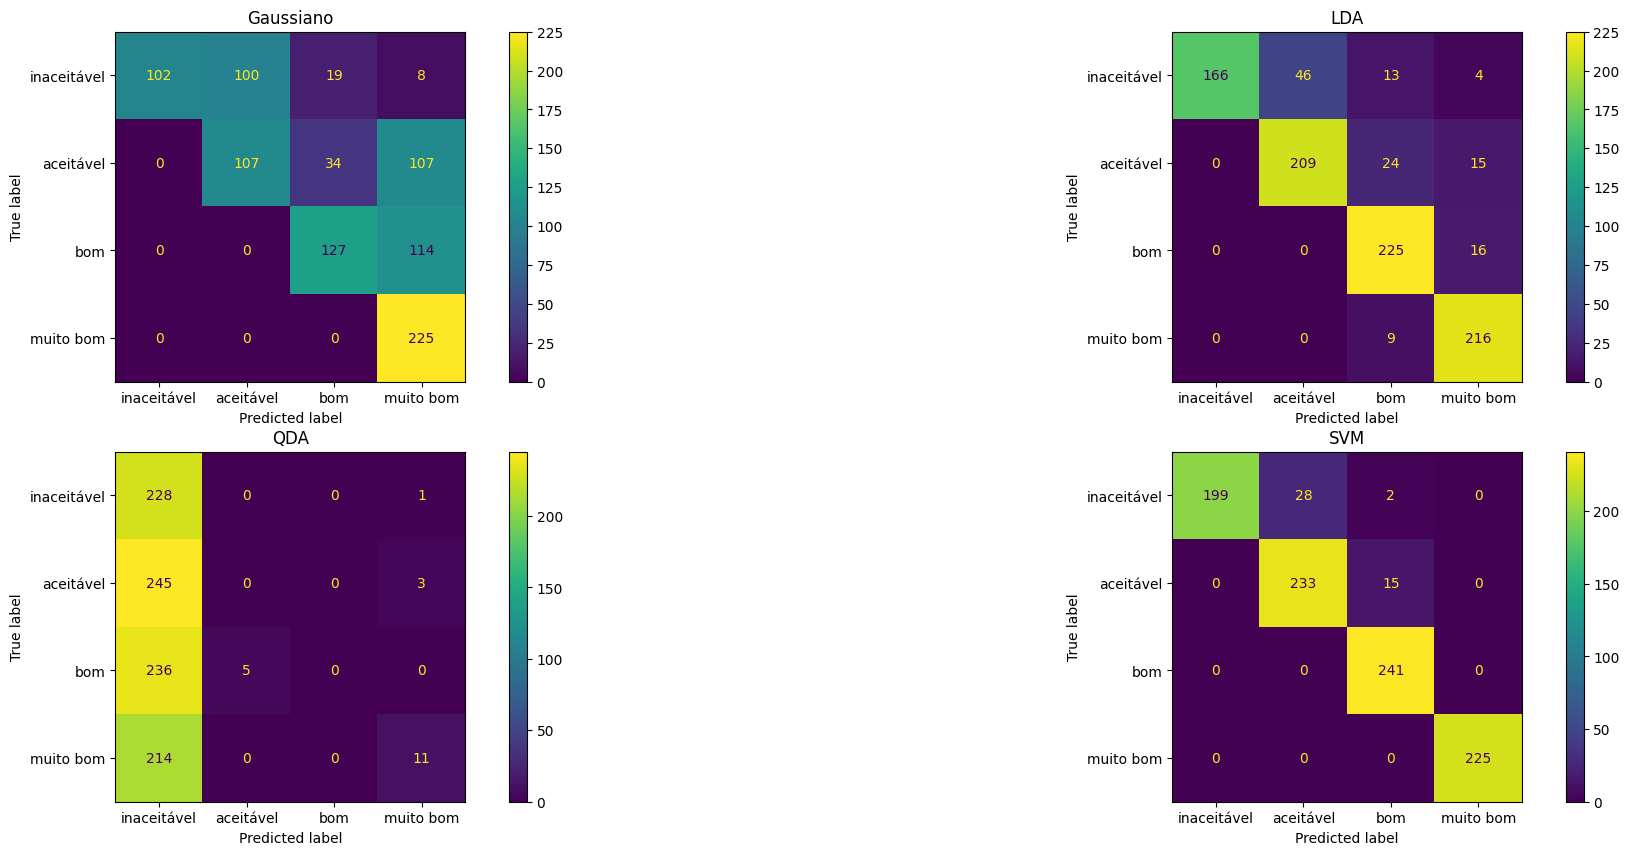

In [59]:
figure = plt.figure(figsize=(25,10))
for i, (nome_modelo, y_p) in enumerate(y_pred.items()):
  cm = confusion_matrix(y_true=y_test,
                        y_pred=y_p,
                        labels=['unacc',
                                'acc',
                                'good',
                                'vgood'])
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['inaceitável',
                                                'aceitável',
                                                'bom',
                                                'muito bom'])
  ax = plt.subplot(2,2,i+1)
  disp.plot(ax=ax)
  ax.set_title(nome_modelo)

Obtendo as métricas:

In [61]:
for nome_modelo, y_p in y_pred.items():
  print(f"Métricas do modelo: {nome_modelo}")
  print(classification_report(y_true=y_test,
                              y_pred=y_p))
  print('-'*53)

Métricas do modelo: Gaussiano
              precision    recall  f1-score   support

         acc       0.52      0.43      0.47       248
        good       0.71      0.53      0.60       241
       unacc       1.00      0.45      0.62       229
       vgood       0.50      1.00      0.66       225

    accuracy                           0.59       943
   macro avg       0.68      0.60      0.59       943
weighted avg       0.68      0.59      0.59       943

-----------------------------------------------------
Métricas do modelo: LDA
              precision    recall  f1-score   support

         acc       0.82      0.84      0.83       248
        good       0.83      0.93      0.88       241
       unacc       1.00      0.72      0.84       229
       vgood       0.86      0.96      0.91       225

    accuracy                           0.87       943
   macro avg       0.88      0.87      0.86       943
weighted avg       0.88      0.87      0.86       943

----------------------

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Podemos perceber que o modelo do SVC foi o que obteve o melhor desempenho nesse cenário. Além disso, o QDA encontrou problemas devido as ferramentas matemáticas que ele usa foram problematicas para os atributos do problema.

#Salvando o Melhor Modelo

## Salavando o escalonamento dos dados

In [62]:
# Separando os dados de entrada e de saída
X = dados.drop(columns=['category'])
y = dados["category"] #Rótulos/Labels

# Dividindo os dados no conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

#Aplicando a normalização aos dados
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
import joblib
#Salvando o objeto scaler como um arquivo pickle
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Salvando o modelo treinado


In [64]:
import joblib
modelos = {'Gaussiano' : GaussianNB(),
           'LDA' : LinearDiscriminantAnalysis(),
           'QDA' : QuadraticDiscriminantAnalysis(),
           'SVM' : SVC(kernel='rbf')}
y_pred = {}
for nome_modelo, modelo in modelos.items():
  # Treinar o modelo:
  modelo.fit(X_train, y_train)
  arquivo = nome_modelo + '.pkl'
  joblib.dump(modelo, arquivo)
  y_pred[nome_modelo] = modelo.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


# Carregando o Pré-processamento e o modelo treinado

In [68]:
dados.columns

Index(['buying', 'maint', 'lug_boot', 'safety', 'category', 'doors_2',
       'doors_3', 'doors_4', 'doors_5more', 'persons_2', 'persons_4',
       'persons_more'],
      dtype='object')

In [70]:
# Carregando os aruivos salvos
load_scaler = joblib.load("/content/scaler.pkl")
load_model = joblib.load("/content/SVM.pkl")

# Recebendo os dados do usuario
data_user = {'buying' : [3],
             'maint' : [4],
             'lug_boot' : [0],
             'safety' : [3],
             'doors_2' : [0],
             'doors_3' : [0],
             'doors_4' : [0],
             'doors_5more' : [1],
             'persons_2' : [0],
             'persons_4' : [0],
             'persons_more' : [1]}
input_user = pd.DataFrame(data_user)
#Aplicando anormalização dos dados do usuario
input_user = load_scaler.transform(input_user)
#Fazendo a estimativa da classe do carro
choice = load_model.predict(input_user)
print(choice[0])
if choice == 'unacc':
  print("Que carro de merda")
elif choice == 'acc':
  print("Até que vale a pena se enganar o cliente")
elif choice == 'good':
  print("Engana esse que é dinheiro facil")
else:
  print("Mate o cliente e rouba esse carro")

['unacc']
